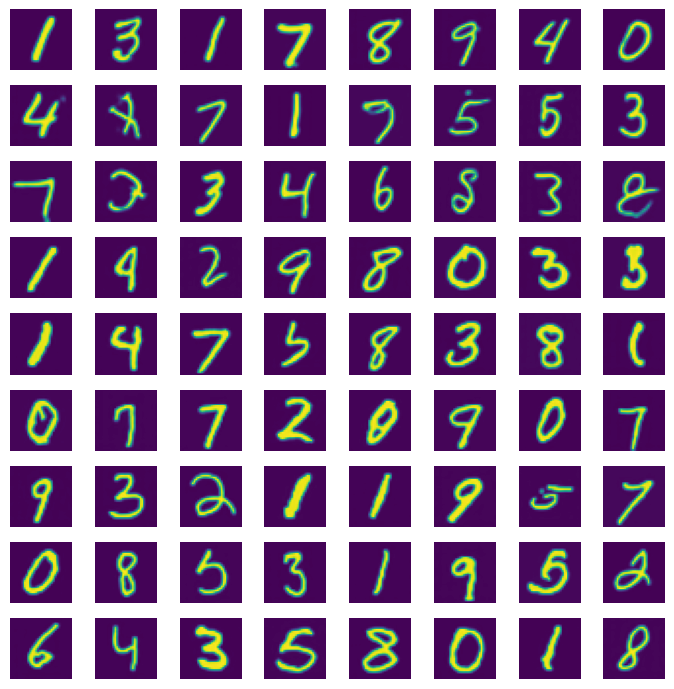

In [18]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


plt.figure(figsize=(7, 7))
config = load_config()
config.ddpm.schedule_type = "linear_beta"

for k, n_steps in enumerate([10, 100, 1000]):
    config.sample.n_steps = n_steps
    x = np.load(config.samples_path)["x"]
    for i in range(24):
        plt.subplot(9, 8, k * 24 + i + 1)
        plt.imshow(x[i, 0])
        plt.axis("off")

plt.tight_layout()
plt.show()

In [2]:
config = load_config()
config.ddpm.schedule_type = "cosine"
config.ddpm.min_t

1e-05

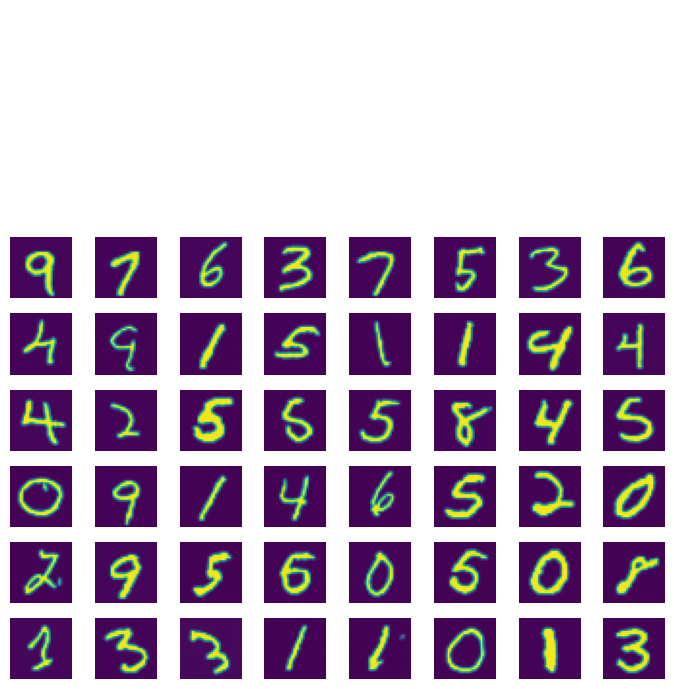

In [1]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


plt.figure(figsize=(7, 7))
config = load_config()
config.ddpm.schedule_type = "cosine"

for k, n_steps in enumerate([10, 100, 1000]):
    config.sample.n_steps = n_steps
    x = np.load(config.samples_path)["x"]
    for i in range(24):
        plt.subplot(9, 8, k * 24 + i + 1)
        plt.imshow(x[i, 0])
        plt.axis("off")

plt.tight_layout()
plt.show()

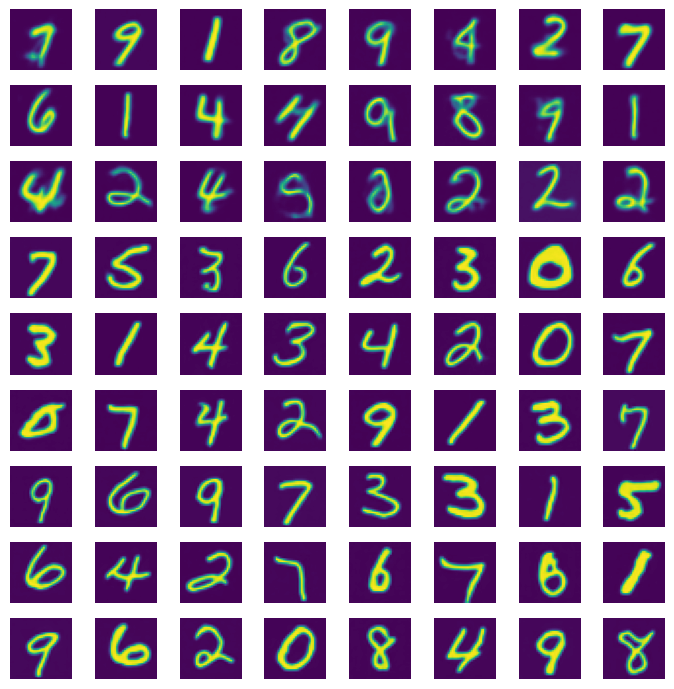

In [4]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


plt.figure(figsize=(7, 7))
config = load_config()
config.ddpm.schedule_type = "flattening_temp_unbiased"

for k, n_steps in enumerate([10, 100, 1000]):
    config.sample.n_steps = n_steps
    x = np.load(config.samples_path)["x"]
    for i in range(24):
        plt.subplot(9, 8, k * 24 + i + 1)
        plt.imshow(x[i, 0])
        plt.axis("off")

plt.tight_layout()
plt.show()

In [9]:
from utils import get_time_evenly_spaced
from diffusion.diffusion_utils import get_cosine_temp_schedule, DynamicCoeffs


temp = get_cosine_temp_schedule()(get_time_evenly_spaced(1000))
dc = DynamicCoeffs(temp)

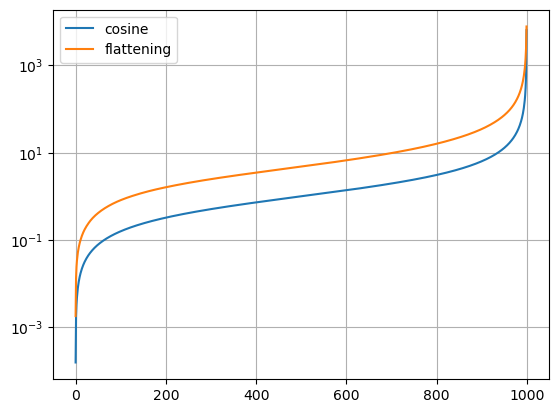

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from config import load_config
from diffusion.diffusion_utils import DynamicCoeffs, get_temp_schedule
from torch import from_numpy
import torch


t = torch.linspace(1e-4, 1 - 1e-4, 1000)
temp_schedule = get_temp_schedule(load_config())

plt.plot(np.tan(0.5 * t * np.pi), label="cosine")
plt.plot(temp_schedule(t), label="flattening")


plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

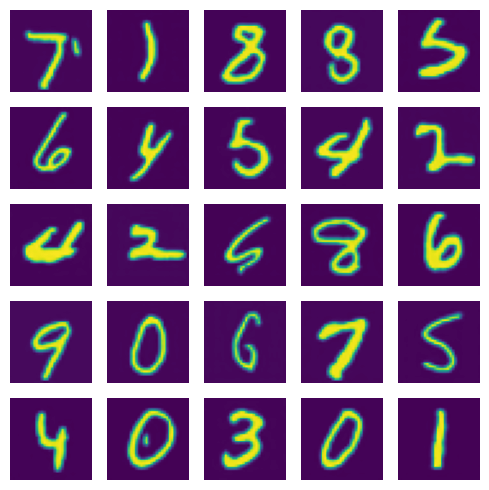

In [1]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


config = load_config()
x = np.load(config.samples_path)["x"]
plt.figure(figsize=(5, 5))
for i, j in product(range(5), range(5)):
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(x[i * 5 + j].reshape(32, 32))
    plt.axis("off")

plt.tight_layout()
plt.show()

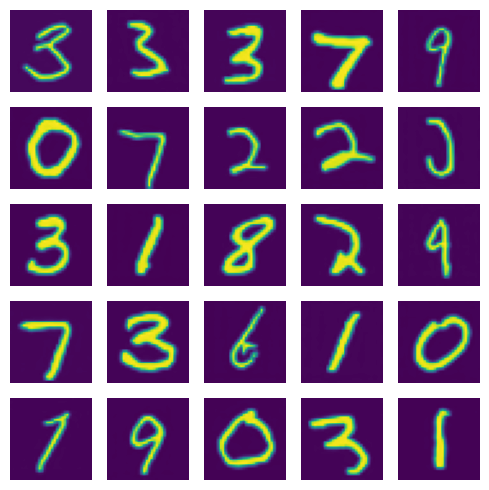

In [1]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


config = load_config()
x = np.load(config.samples_path)["x"]
plt.figure(figsize=(5, 5))
for i, j in product(range(5), range(5)):
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(x[i * 5 + j].reshape(32, 32))
    plt.axis("off")

plt.tight_layout()
plt.show()

/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


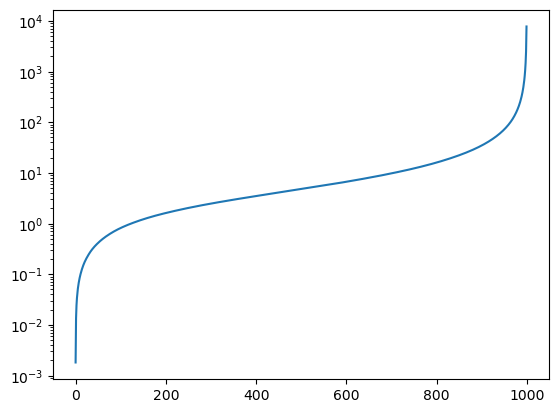

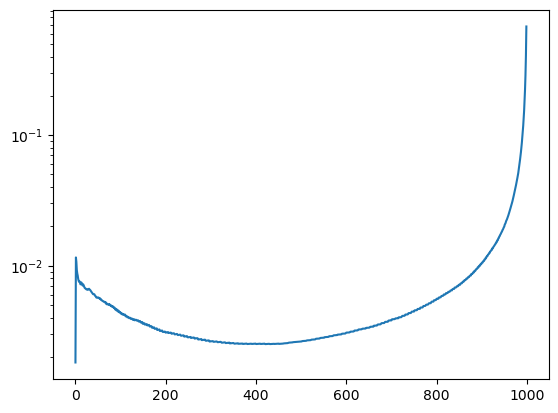

In [2]:
from diffusion.diffusion_utils import DynamicCoeffs
from torch import from_numpy


dynamic_coeffs = DynamicCoeffs(from_numpy(np.load(config.samples_path)["temp"]).squeeze())

plt.figure()
plt.plot(dynamic_coeffs.temp)
plt.yscale("log")

plt.figure()
plt.plot(dynamic_coeffs.beta)
plt.yscale("log")

plt.show()

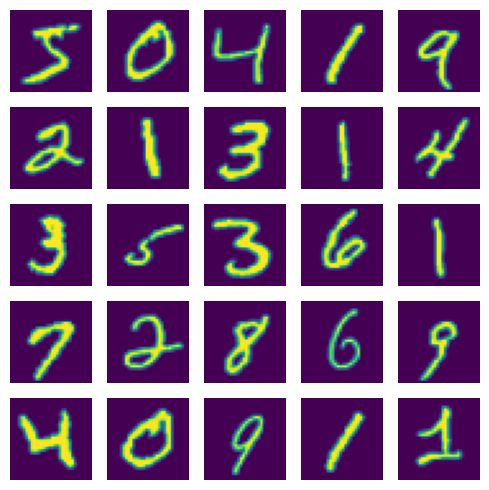

In [4]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from utils import get_data_tensor


config = load_config()
x = get_data_tensor(config)
plt.figure(figsize=(5, 5))
for i, j in product(range(5), range(5)):
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(x[i * 5 + j].reshape(32, 32))
    plt.axis("off")

plt.tight_layout()
plt.show()

In [10]:
from pytorch_fid import fid_score

In [15]:
[*filter(lambda x: "model" in x, fid_score.__dict__)]

[]

In [16]:
fid_score.__dict__

{'__name__': 'pytorch_fid.fid_score',
 '__doc__': 'Calculates the Frechet Inception Distance (FID) to evalulate GANs\n\nThe FID metric calculates the distance between two distributions of images.\nTypically, we have summary statistics (mean & covariance matrix) of one\nof these distributions, while the 2nd distribution is given by a GAN.\n\nWhen run as a stand-alone program, it compares the distribution of\nimages that are stored as PNG/JPEG at a specified location with a\ndistribution given by summary statistics (in pickle format).\n\nThe FID is calculated by assuming that X_1 and X_2 are the activations of\nthe pool_3 layer of the inception net for generated samples and real world\nsamples respectively.\n\nSee --help to see further details.\n\nCode apapted from https://github.com/bioinf-jku/TTUR to use PyTorch instead\nof Tensorflow\n\nCopyright 2018 Institute of Bioinformatics, JKU Linz\n\nLicensed under the Apache License, Version 2.0 (the "License");\nyou may not use this file exc